# Lasso and Compressed Sensing of ECG data from MITDB physionet.org

## PART I: MITDB data reader - WFDB library

### Step 1: Retrieving the Data Path

To read the MITDB (MIT-BIH Arrhythmia Database) data using the `wfdb` library, we first need to retrieve the data path. In this Jupyter Notebook, the data path is stored in the `data_folder` variable.
We can use this path to locate the specific record we want to read. In this case, the record number is stored in the `record_number` variable.

To construct the full path to the record, we can use the `os.path.join()` function as follows:



In [40]:
import os

# Define the project root directory (assuming the notebook is in the root directory)
project_root = os.getcwd()  # Gets the current working directory, which is the root in this case

# Define the relative path to the data folder
data_folder = os.path.join(project_root, 'data', 'physionet.org', 'files', 'mitdb', '1.0.0')

# Specify the record number
record_number = '100'  # Change this to the desired record number

# Construct the full path to the record
record_path = os.path.join(data_folder, record_number)


# print record_path
print(record_path)


/home/franco/Dropbox/AA_Fra_Rosnati/B_Education/AA_University/AA_PoliMi/AA_Ing/01_Magistrale/HPC_engineering/1_sem_HPC/NAML/NAML_project/NAML_ECG_compressor/data/physionet.org/files/mitdb/1.0.0/100



### Step 2: Load the signal and annotations
In the code above, we first import the `wfdb` module. Then, we use the `rdrecord()` function to load the signal from the specified `record_path`. We also use the `rdann()` function to load the annotations for the same record. 

After executing this code, the signal will be stored in the `record` variable, and the annotations will be stored in the `annotation` variable.

We will then visualize the whole signal, it's unreadable on a 30 hours time frame, it's only we will check if loading went correctly

In [41]:

import wfdb

# Load the signal and annotations
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_name=record_path, extension='atr', shift_samps=True)


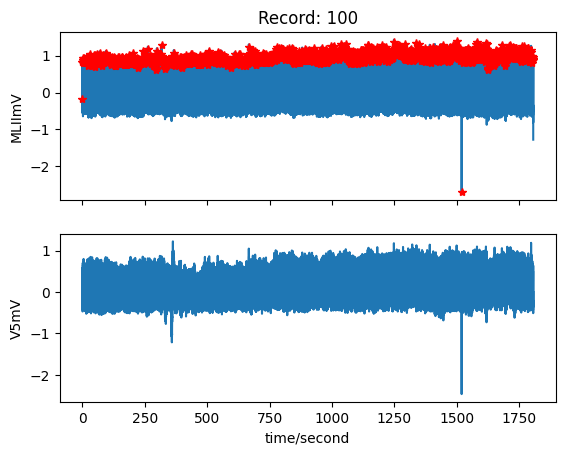

In [42]:
# Plot the signal with annotations
wfdb.plot_wfdb(record=record, annotation=annotation)

### Step 3: moving data to Pandas dataframe
Simply use the proper function from `wfdb` library

In [43]:
import pandas as pd
df = record.to_dataframe()

print(df.head())
print("\n")
print(df.dtypes)



                            MLII     V5
0 days 00:00:00           -0.145 -0.065
0 days 00:00:00.002777777 -0.145 -0.065
0 days 00:00:00.005555554 -0.145 -0.065
0 days 00:00:00.008333331 -0.145 -0.065
0 days 00:00:00.011111108 -0.145 -0.065


MLII    float64
V5      float64
dtype: object
